In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

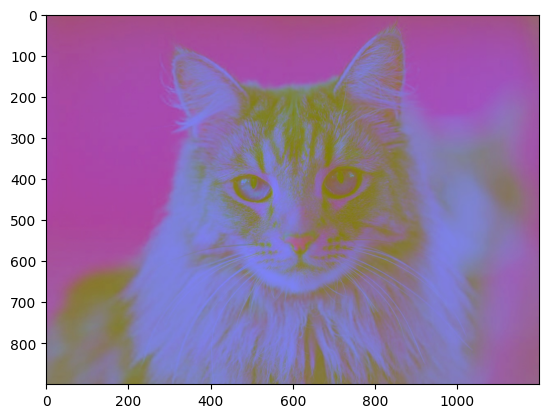

In [14]:
filename = 'cat.jpg'
yuvFilename = 'yuv_' + filename
img = cv2.imread(yuvFilename) # BRG
img[:,:,[0,2]] = img[:,:,[2,0]] # BRG -> RGB
plt.imshow(img)

In [15]:
invA = np.array( [[1,  0      , 1.402  ],
                  [1, -0.34414, -.71414],
                  [1,  1.772  , 0      ]]).T
def YUV2RGB(im):
    rgb = im.astype(np.float64)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(invA)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

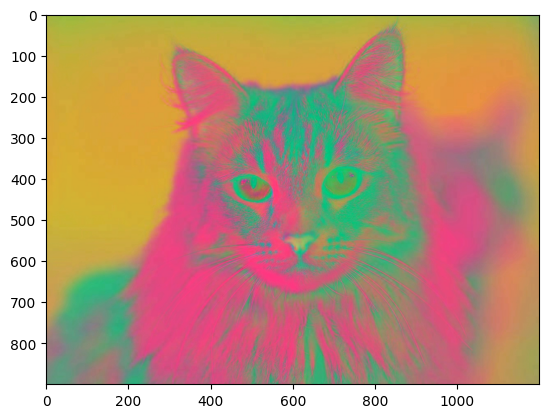

In [16]:
img = YUV2RGB(img)
plt.imshow(img)